## **Feature Extraction de un audio**
---

In [ ]:
# Activa inline plots
%matplotlib inline
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

import os
import numpy as np
import pandas as pd

from utils_audio import (
    preprocess_audio,
    plot_waveform,
    plot_spectrogram,
    extract_mfcc,
    extract_chroma,
    extract_spectral_contrast,
    extract_tonnetz,
    extract_zcr,
    extract_centroid_rolloff,
)

# Directorio donde guardar las imágenes del feature extraction
IMG_DIR = os.path.join("..", "images", "audio", "feature_extraction")

In [ ]:
# Ruta al archivo de audio en crudo
audio_path = os.path.join(
    "data", "outputs", "6_audio", "efectos_adversos", "audio_9_angel.wav"
)

# Preprocesar el audio (solo devuelve y)
y = preprocess_audio(
    audio_path,
    sr=16000,
    trim_db=20.0,
    lowcut=300.0,
    highcut=3400.0,
    pre_coef=0.97,
    rms_target=0.1,
    reduce_noise_flag=True,
    plot=False,
    save_dir=None,
)

# Definimos sr manualmente
sr = 16000

print(
    f"Señal lista para extracción de features — Duración: {len(y)/sr:.2f}s, SR={sr}Hz"
)

Señal lista para extracción de features — Duración: 4.16s, SR=16000Hz


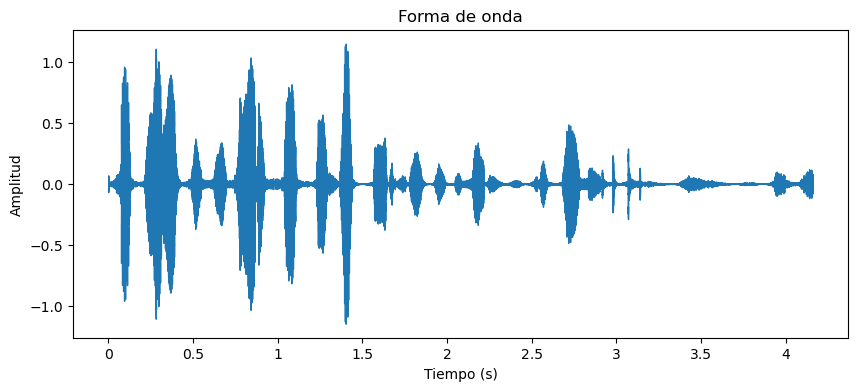

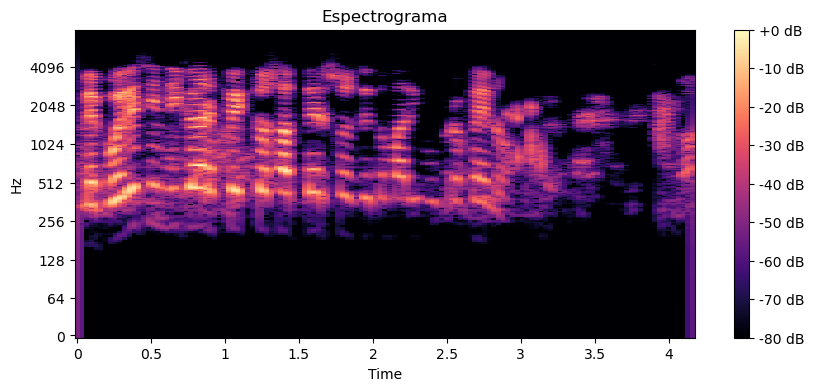

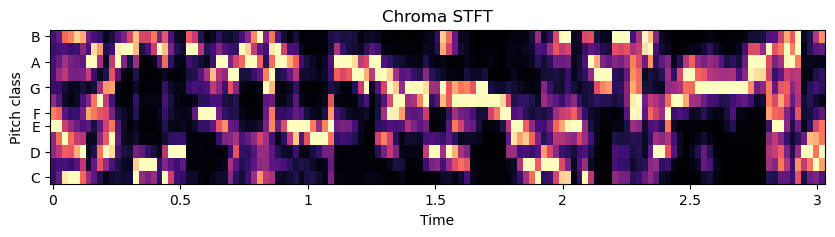

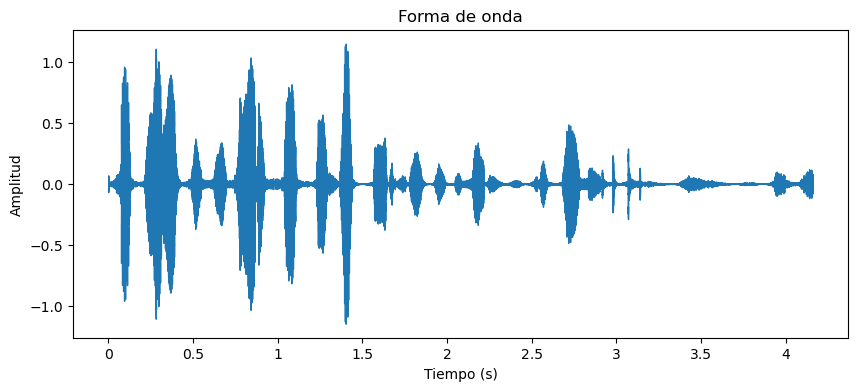

/Users/angel/Desktop/MASTER/SEGUNDO_CUATRI/AnalisisNoEstructurados/Trabajo/PharmAI/audio/utils_audio.py:286: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


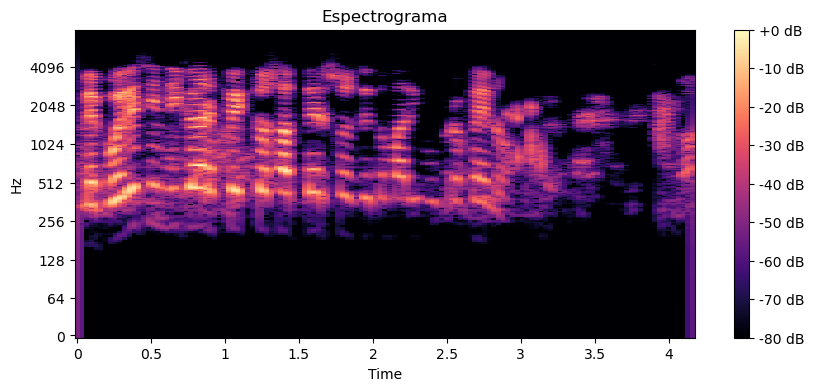

In [12]:
plot_waveform(y, sr, title="Forma de onda")
plot_spectrogram(y, sr, title="Espectrograma")

In [ ]:
mfccs = extract_mfcc(y, sr, n_mfcc=13, plot=True)
print(f"MFCCs: shape={mfccs.shape}")

MFCCs: shape=(13, 131)


In [5]:
chroma = extract_chroma(y, sr, plot=True)
print(f"Chroma STFT: shape={chroma.shape}")

IndexError: list index out of range

In [ ]:
contrast = extract_spectral_contrast(y, sr, plot=True)
print(f"Spectral Contrast: shape={contrast.shape}")

In [ ]:
tonnetz = extract_tonnetz(y, sr, plot=True)
print(f"Tonnetz: shape={tonnetz.shape}")

In [ ]:
zcr = extract_zcr(y, sr, plot=True)
print(f"Zero-Crossing Rate: shape={zcr.shape}")

In [ ]:
centroid, rolloff = extract_centroid_rolloff(y, sr, plot=True)
print(f"Centroid: {centroid.shape}, Rolloff: {rolloff.shape}")

In [ ]:
def aggregate_stats(features: dict) -> pd.DataFrame:
    """
    Recibe un dict de matrices/vectores {name: np.array} y devuelve
    un DataFrame de 1 fila con mean/var de cada dimensión.
    """
    stats = {}
    for key, arr in features.items():
        arr1d = np.atleast_1d(arr)
        if arr1d.ndim > 1:
            means = np.mean(arr1d, axis=1)
            vars = np.var(arr1d, axis=1)
            for i, (m, v) in enumerate(zip(means, vars)):
                stats[f"{key}_mean_{i}"] = m
                stats[f"{key}_var_{i}"] = v
        else:
            stats[f"{key}_mean"] = np.mean(arr1d)
            stats[f"{key}_var"] = np.var(arr1d)
    return pd.DataFrame([stats])


all_feats = {
    "mfcc": mfccs,
    "chroma": chroma,
    "contrast": contrast,
    "tonnetz": tonnetz,
    "zcr": zcr,
    "centroid": centroid,
    "rolloff": rolloff,
}

features_df = aggregate_stats(all_feats)
print(f"DataFrame de features: {features_df.shape}")
features_df.head()